## Find MST and Median tree

steps:
1.Takes a weighted graph as input

2.Finds its Minimum Spanning Tree (MST) using Kruskal's algorithm

3.Finds all spanning trees

4.Identifies the Median Spanning Tree (minimizing total edge distance to all others)

In [1]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt


In [2]:
class UnionFind:
    """Union-Find data structure for Kruskal's algorithm"""
    def __init__(self, size):
        self.parent = list(range(size))

    def find(self, x):
        while self.parent[x] != x:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x

    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)
        if x_root != y_root:
            self.parent[y_root] = x_root


In [3]:
def get_graph_input():
    """Interactive graph input"""
    G = nx.Graph()
    print("Enter edges as 'u v weight' (blank line to finish):")
    while True:
        edge = input().strip()
        if not edge:
            break
        u, v, w = edge.split()
        G.add_edge(u, v, weight=float(w))
    return G


In [4]:
def kruskal_mst(G):
    """Kruskal's algorithm for MST"""
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    uf = UnionFind(len(G.nodes()))
    mst = nx.Graph()

    for u, v, data in edges:
        if uf.find(list(G.nodes()).index(u)) != uf.find(list(G.nodes()).index(v)):
            mst.add_edge(u, v, **data)
            uf.union(list(G.nodes()).index(u), list(G.nodes()).index(v))
    return mst


In [5]:
def get_all_spanning_trees(G):
    """Brute-force all spanning trees (for small graphs)"""
    nodes = list(G.nodes())
    edges = list(G.edges())
    all_trees = []

    for edge_subset in combinations(edges, len(nodes)-1):
        H = nx.Graph()
        H.add_nodes_from(nodes)
        H.add_edges_from(edge_subset)
        if nx.is_connected(H):
            all_trees.append(set(edge_subset))
    return all_trees


In [6]:
def find_median_tree(G, all_trees):
    """Find tree with minimal total edge distance to others"""
    min_distance = float('inf')
    median_tree = None

    for tree in all_trees:
        total_dist = 0
        for other in all_trees:
            # Symmetric difference distance
            total_dist += len(tree.symmetric_difference(other))

        if total_dist < min_distance:
            min_distance = total_dist
            median_tree = tree

    return nx.Graph(list(median_tree))


In [7]:
def plot_tree(tree, title="Tree"):
    """Visualize a tree using matplotlib."""
    pos = nx.spring_layout(tree)  # Layout algorithm
    nx.draw(tree, pos, with_labels=True, node_color='lightblue',
            node_size=800, font_size=12, font_weight='bold',
            edge_color='gray', arrows=False)
    plt.title(title)
    plt.show()


Enter edges as 'u v weight' (blank line to finish):
a b 1
a c 3
b c 3
b d 6
c d 4
c e 2
e d 5



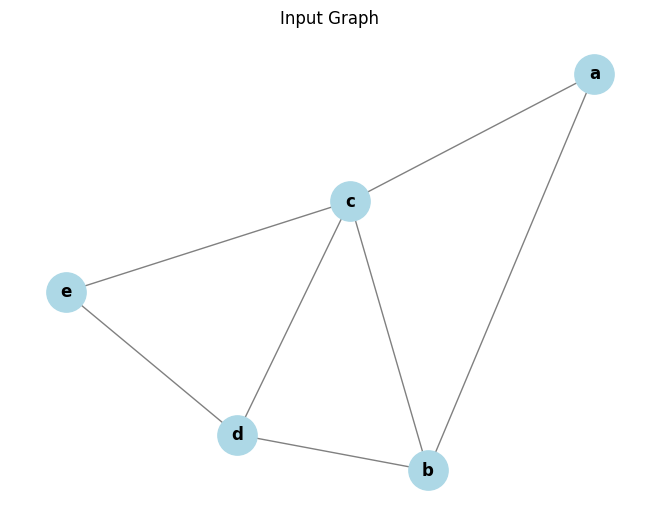


Minimum Spanning Tree (MST):
[('a', 'b', {'weight': 1.0}), ('a', 'c', {'weight': 3.0}), ('c', 'd', {'weight': 4.0}), ('c', 'e', {'weight': 2.0})]


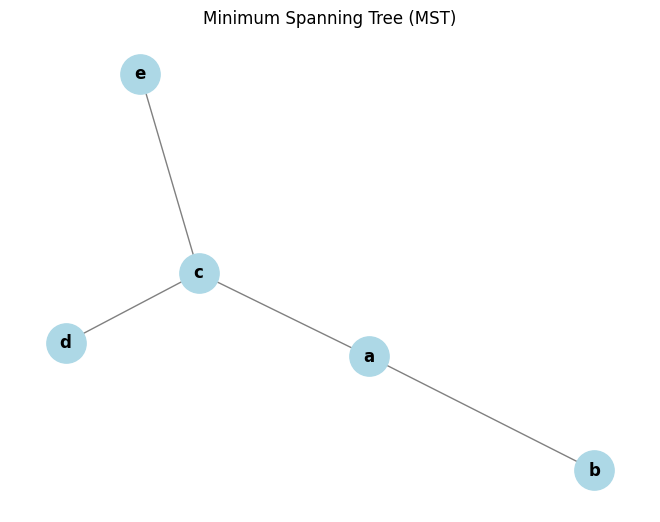


Median Spanning Tree:
[('a', 'b'), ('a', 'c'), ('c', 'e'), ('d', 'e')]


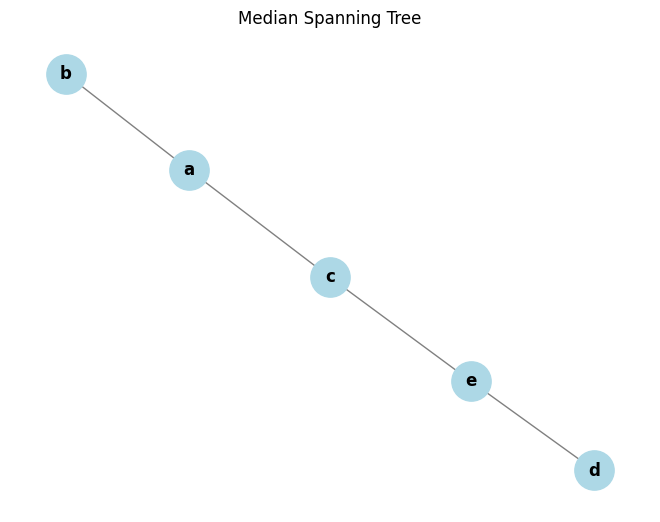

In [8]:
# Main execution (updated)
if __name__ == "__main__":
    G = get_graph_input()  # From previous implementation

    # Plot the input graph
    plot_tree(G, title="Input Graph")

    # 1. Find MST using Kruskal's
    mst = kruskal_mst(G)
    print("\nMinimum Spanning Tree (MST):")
    print(sorted(mst.edges(data=True)))
    plot_tree(mst, title="Minimum Spanning Tree (MST)")

    # 2. Find Median Spanning Tree
    all_trees = get_all_spanning_trees(G)
    if len(all_trees) > 1:
        median_tree = find_median_tree(G, all_trees)
        print("\nMedian Spanning Tree:")
        print(sorted(median_tree.edges()))
        plot_tree(median_tree, title="Median Spanning Tree")
    else:
        print("\nOnly one spanning tree exists (itself the median)")